In [1]:
# Database manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

# Natural language Toolkit packages.
# Necessary libraries and modules that are 
# going to help us do the data processing 
# from the nltk library.
import nltk

#nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
import string

# Regular expression
import re


In [2]:
tweets = pd.read_csv("train.csv")

In [4]:
pro_df = tweets[tweets['sentiment'] == 1]
anti_df = tweets[tweets['sentiment'] == -1]
neutral_df = tweets[tweets['sentiment'] == 0]
news_df = tweets[tweets['sentiment'] == 2]

print('pro_df:' ,len(pro_df),'\nanti_df:',len(anti_df), '\nneutral_df:', len(neutral_df), '\nnews_df:', len(news_df))

pro_df: 8530 
anti_df: 1296 
neutral_df: 2353 
news_df: 3640


In [7]:
# Function to clean data

def clean_data(df):
    """ Explain
    
    """
    
    #stemmer1 = PorterStemmer()
    #lemmatizer = WordNetLemmatizer()
    stop_words = stopwords.words('english')
    punct = string.punctuation

    clean_list = []
    
    for i in range(len(df)):
        tweet=re.sub(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?',' ',df.iloc[i])  #Removing urls from messages
        tweet=re.sub('[^a-zA-Z]',' ',tweet)  #Makes sure only letter are in the message
        tweet=tweet.lower().split()   #Lowecase and splits all words
        #tweet=[stemmer1.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]  # Stems the words in tweet if does not
        tweet = [word for word in tweet if (word not in stop_words) and (word not in punct)]                                                                                                   # contain stopwords and punctuation. 
        #tweet = [lemmatizer.lemmatize(word) for word in tweet]  # Lemmatize the words in the tweets
        tweet=' '.join(tweet)  # Joining the cleaned split words
        clean_list.append(tweet)  # Creates a list of the cleaned tweets.
        
    return clean_list

In [9]:
clean_pr = clean_data(pro_df['message'])
clean_neutral = clean_data(anti_df['message'])
clean_anti = clean_data(neutral_df['message'])
clean_news = clean_data(news_df['message'])

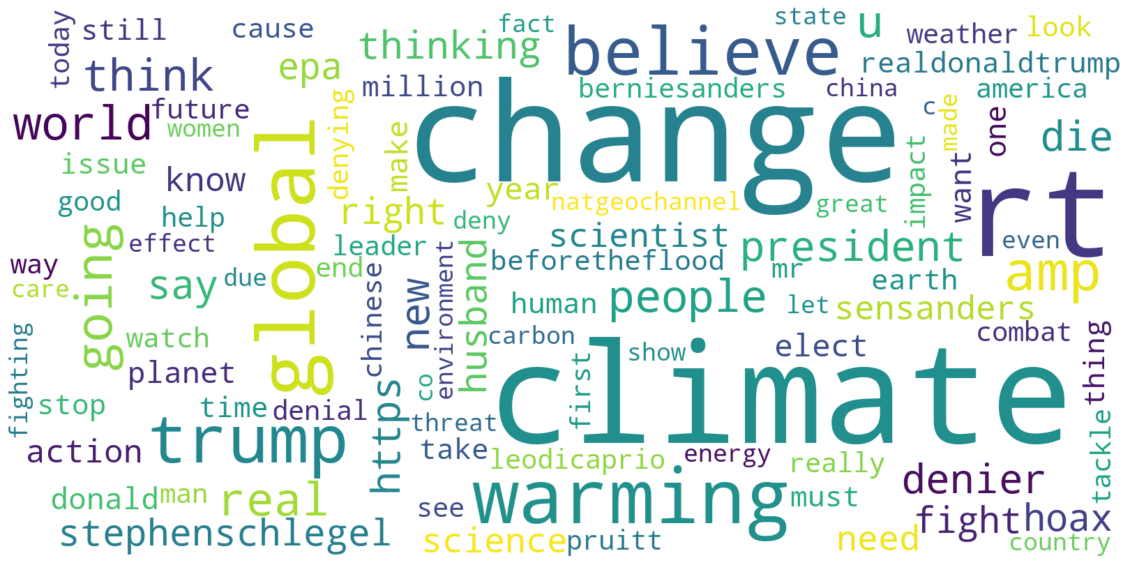

In [10]:
# Wordcloud Pro

string_1 = pd.Series(clean_pr).str.cat(sep=' ')   #This creates a list of single strings to generate the wordcloud.

wordcloud_1 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(string_1)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

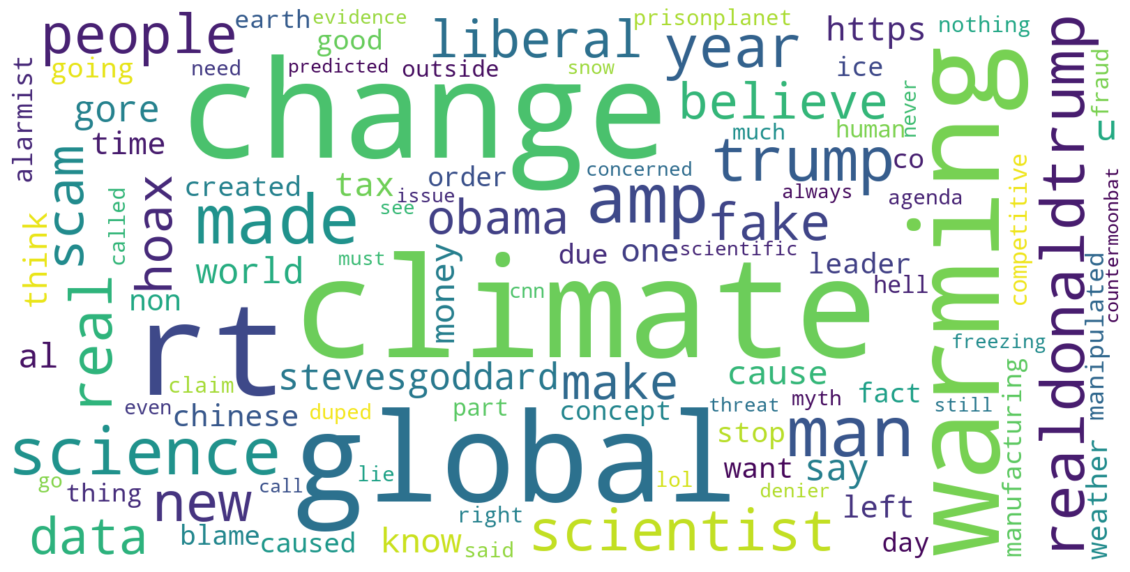

In [11]:
# Wordcloud Pro

string_1 = pd.Series(clean_neutral).str.cat(sep=' ')   #This creates a list of single strings to generate the wordcloud.

wordcloud_1 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(string_1)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

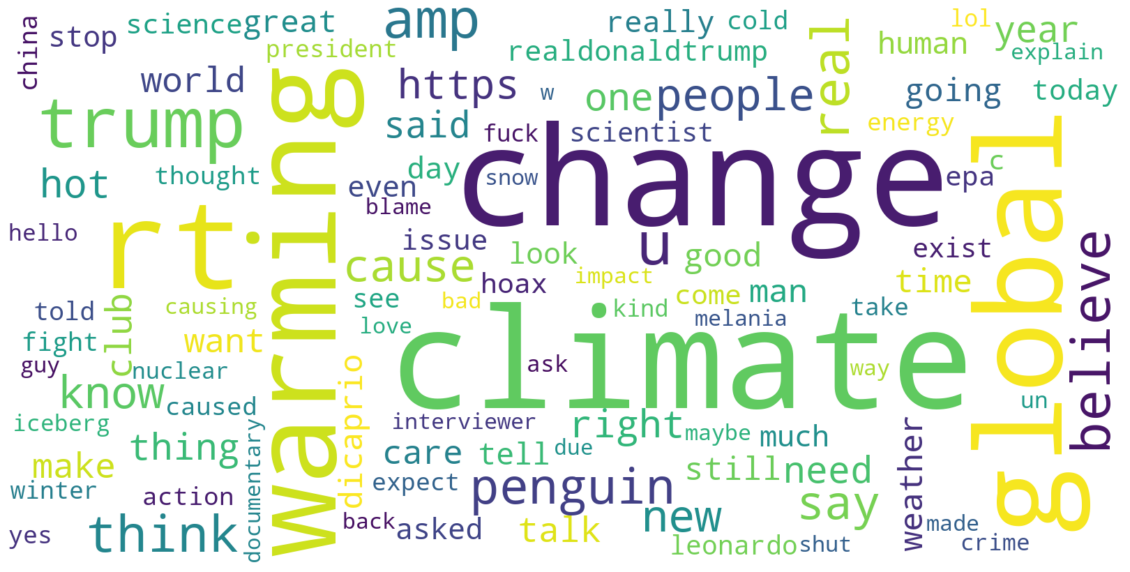

In [12]:
# Wordcloud Pro

string_1 = pd.Series(clean_anti).str.cat(sep=' ')   #This creates a list of single strings to generate the wordcloud.

wordcloud_1 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(string_1)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

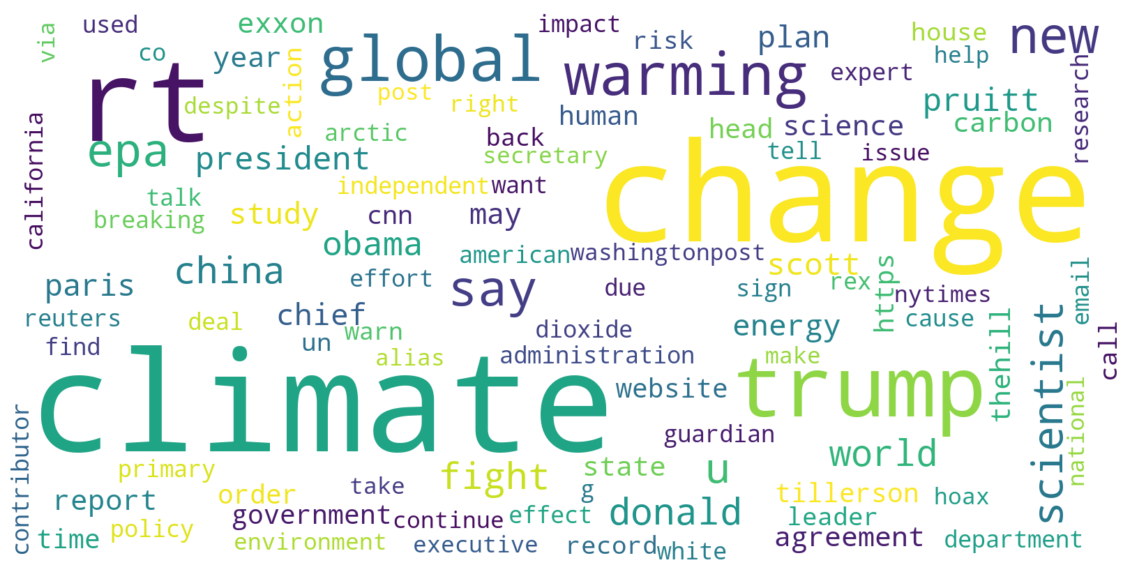

In [13]:
# Wordcloud Pro

string_1 = pd.Series(clean_news).str.cat(sep=' ')   #This creates a list of single strings to generate the wordcloud.

wordcloud_1 = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(string_1)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
def clean_string(message):

    stop_words = stopwords.words('english')
    punct = string.punctuation
    stemmer1 = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    tweet = re.sub(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?',' ',message)
    tweet = re.sub('[^a-zA-Z]',' ',tweet)
    tweet = tweet.lower().split()
    
    tweet=[stemmer1.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
    tweet = [lemmatizer.lemmatize(word) for word in tweet]
    tweet=' '.join(tweet)
    
    return tweet

In [25]:
c1 = clean_string("Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j")


In [26]:
c1

'worth read whether believ climat chang'